In [ ]:
!git clone https://github.com/Char1iee/NBA_Odds_Analysis.git

fatal: destination path 'NBA_Odds_Analysis' already exists and is not an empty directory.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import keras
from keras import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping


In [ ]:
X = pd.read_csv("NBA_Odds_Analysis/inputs.csv")
Y = pd.read_csv("NBA_Odds_Analysis/outputs.csv")


In [ ]:
X

,date,season,team,home/visitor,opponent,day,day_of_week,month,games_played,cumulative_wins,cumulative_win_rate,cumulative_score,average_score,opponent_games_played,opponent_cumulative_wins,opponent_win_rate
0,2007-10-30,0.0,0.967742,0.0,0.290323,0.966667,0.166667,0.818182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,2007-10-30,0.0,0.419355,1.0,0.322581,0.966667,0.166667,0.818182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,2007-10-30,0.0,0.322581,0.0,0.419355,0.966667,0.166667,0.818182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,2007-10-30,0.0,0.870968,1.0,0.806452,0.966667,0.166667,0.818182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,2007-10-30,0.0,0.806452,0.0,0.870968,0.966667,0.166667,0.818182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37099,2023-01-16,1.0,0.935484,0.0,0.645161,0.500000,0.000000,0.000000,0.530864,0.338028,0.558140,0.502194,0.798339,0.666667,0.333333,0.5
37100,2023-01-16,1.0,0.451613,1.0,0.774194,0.500000,0.000000,0.000000,0.518519,0.183099,0.309524,0.514002,0.836565,0.666667,0.333333,0.5
37101,2023-01-16,1.0,0.645161,1.0,0.935484,0.500000,0.000000,0.000000,0.543210,0.267606,0.431818,0.524660,0.815097,0.666667,0.333333,0.5
37102,2023-01-16,1.0,0.548387,1.0,0.967742,0.500000,0.000000,0.000000,0.543210,0.309859,0.500000,0.527795,0.819968,0.666667,0.333333,0.5


In [ ]:
Y

,moneyLine,total,spread,secondHalfTotal,score,win
0,0.671795,0.515528,0.523256,0.524390,0.975165,0.0
1,0.676410,0.354037,0.616279,0.365854,-0.829566,1.0
2,0.654872,0.354037,0.383721,0.365854,-0.679171,0.0
3,0.594872,0.236025,0.197674,0.268293,0.147997,0.0
4,0.712821,0.236025,0.802326,0.268293,-0.528777,1.0
...,...,...,...,...,...,...
37099,0.671795,0.596273,0.534884,0.548780,1.426347,0.0
37100,0.625641,0.751553,0.209302,0.829268,2.403910,0.0
37101,0.660513,0.596273,0.465116,0.548780,1.275953,1.0
37102,0.657692,0.763975,0.406977,0.853659,1.576742,1.0


In [ ]:
X = np.asarray(X.drop(columns = ['date'])).astype('float32')
Y = np.asarray(Y).astype('float32')

In [ ]:
X

array([[0.        , 0.9677419 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.41935483, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.32258064, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.6451613 , 1.        , ..., 0.6666667 , 0.33333334,
        0.5       ],
       [1.        , 0.5483871 , 1.        , ..., 0.6666667 , 0.33333334,
        0.5       ],
       [1.        , 0.29032257, 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [ ]:
Y

array([[ 0.6717949 ,  0.51552796,  0.5232558 ,  0.5243902 ,  0.97516483,
         0.        ],
       [ 0.67641026,  0.35403726,  0.61627907,  0.36585367, -0.8295657 ,
         1.        ],
       [ 0.6548718 ,  0.35403726,  0.38372093,  0.36585367, -0.6791715 ,
         0.        ],
       ...,
       [ 0.6605128 ,  0.5962733 ,  0.4651163 ,  0.5487805 ,  1.2759533 ,
         1.        ],
       [ 0.6576923 ,  0.76397514,  0.40697673,  0.85365856,  1.5767417 ,
         1.        ],
       [ 0.6594872 ,  0.7950311 ,  0.43023255,  0.74390244,  1.7271359 ,
         0.        ]], dtype=float32)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, shuffle = False)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, shuffle = False)

In [ ]:
x_train.shape

(20777, 15)

In [ ]:
x_val.shape

(5195, 15)

In [ ]:
y_train.shape[1]

6

In [ ]:
model = Sequential()
model.add(Dense(units = 32, activation = 'relu', input_dim = x_train.shape[1]))
model.add(Dense(units = 16, activation = 'relu'))
#model.add(Dense(units = 8, activation = 'relu'))
model.add(Dense(units = y_train.shape[1]))

model.compile(optimizer = 'adam', loss = 'mse')

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=2,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

In [ ]:
history = model.fit(x_train, y_train, validation_data = (x_val, y_val), callbacks = [early_stopping], epochs = 100, batch_size = 16)

Epoch 1/100
1299/1299 [==============================] - 2s 1ms/step - loss: 0.1838 - val_loss: 0.2134
Epoch 2/100
1299/1299 [==============================] - 2s 1ms/step - loss: 0.1766 - val_loss: 0.2233
Epoch 3/100
1299/1299 [==============================] - 2s 1ms/step - loss: 0.1756 - val_loss: 0.2054
Epoch 4/100
1299/1299 [==============================] - 2s 1ms/step - loss: 0.1746 - val_loss: 0.2046
Epoch 5/100
1299/1299 [==============================] - 2s 2ms/step - loss: 0.1737 - val_loss: 0.1937
Epoch 6/100
1299/1299 [==============================] - 2s 1ms/step - loss: 0.1725 - val_loss: 0.1932
Epoch 7/100
1299/1299 [==============================] - 2s 1ms/step - loss: 0.1710 - val_loss: 0.1823
Epoch 8/100
1299/1299 [==============================] - 2s 1ms/step - loss: 0.1696 - val_loss: 0.1921
Epoch 9/100
1299/1299 [==============================] - 2s 1ms/step - loss: 0.1686 - val_loss: 0.1803
Epoch 10/100
1299/1299 [==============================] - 2s 1ms/step - l

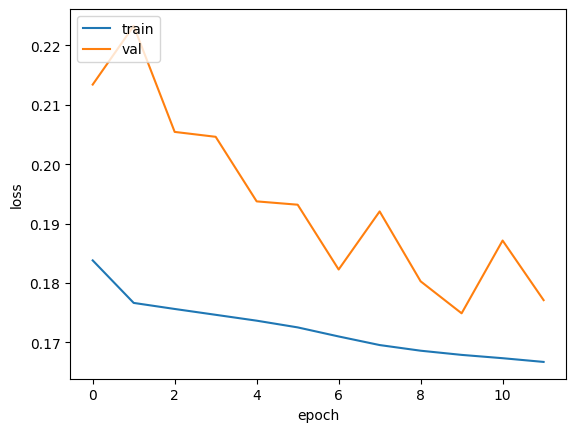

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

In [ ]:
y_pred_train = model.predict(x_train)
y_pred_val = model.predict(x_val)
y_pred_test = model.predict(x_test)

348/348 [==============================] - 0s 789us/step


In [ ]:
def print_mse(y_true, yhat):
    for i in range(Y.shape[1]):
        print("MSE:")
        print(f"{mean_squared_error(y_true[:, i], yhat[:, i])}")

In [ ]:
print_mse(y_train, y_pred_train)

MSE:
0.0007405829965136945
MSE:
0.01077983807772398
MSE:
0.013738835230469704
MSE:
0.010634257458150387
MSE:
0.733707845211029
MSE:
0.22290891408920288


In [ ]:
print_mse(y_val, y_pred_val)

MSE:
0.00119961763266474
MSE:
0.012334341183304787
MSE:
0.015320814214646816
MSE:
0.015759117901325226
MSE:
0.7867792844772339
MSE:
0.2312953770160675


In [ ]:
print_mse(y_test, y_pred_test)

MSE:
0.0004982757964171469
MSE:
0.019825082272291183
MSE:
0.01673010177910328
MSE:
0.019673064351081848
MSE:
0.9938808083534241
MSE:
0.23684947192668915
